#                         Project 4 Markov Decision Processes

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import matplotlib.pyplot as plt
import numpy as np
# Load the wines.csv dataset
data = pd.read_csv("C:\\Users\\n\\Downloads\\wines.csv")
data.head()


,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
1,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
2,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
3,1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
4,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


In [51]:
data.tail()

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
25,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725
26,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
27,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
28,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
29,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [52]:
data.describe()

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.000000,12.989000,2.255000,2.327667,19.283333,97.533333,2.108333,1.757000,0.384333,1.502333,5.103333,0.983333,2.439333,762.866667
std,0.830455,0.652366,1.184558,0.369078,3.507340,13.753328,0.495484,0.904754,0.120192,0.543702,2.408344,0.261420,0.746167,251.083409
min,1.000000,11.030000,0.900000,1.360000,10.600000,78.000000,1.150000,0.470000,0.240000,0.420000,1.900000,0.570000,1.270000,372.000000
25%,1.000000,12.470000,1.502500,2.152500,16.850000,88.000000,1.672500,0.795000,0.280000,1.192500,3.725000,0.742500,1.820000,565.000000
50%,2.000000,13.060000,1.820000,2.365000,19.250000,98.000000,2.055000,1.925000,0.360000,1.460000,4.425000,1.065000,2.395000,737.500000
75%,3.000000,13.467500,3.092500,2.547500,21.875000,103.500000,2.457500,2.590000,0.492500,1.682500,5.835000,1.120000,2.870000,956.250000
max,3.000000,14.340000,5.190000,3.220000,25.000000,136.000000,3.000000,3.230000,0.610000,2.760000,13.000000,1.710000,4.000000,1285.000000


In [53]:
# Preprocess the data by normalizing and discretizing
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data.iloc[:,1:])
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_disc = est.fit_transform(data_norm)
print(data_disc)

[[7. 2. 6. 6. 3. 7. 7. 1. 5. 1. 4. 9. 5.]
 [6. 2. 9. 9. 7. 8. 8. 6. 6. 1. 4. 7. 5.]
 [6. 1. 3. 3. 3. 6. 7. 1. 4. 1. 5. 5. 7.]
 [8. 2. 5. 4. 3. 7. 8. 0. 5. 1. 4. 9. 7.]
 [8. 2. 5. 4. 4. 6. 8. 4. 6. 1. 5. 5. 6.]
 [5. 1. 6. 5. 2. 7. 6. 0. 4. 1. 4. 8. 7.]
 [6. 1. 4. 4. 2. 6. 6. 0. 3. 1. 3. 5. 9.]
 [7. 2. 6. 5. 5. 6. 7. 1. 4. 2. 4. 5. 7.]
 [6. 1. 6. 5. 3. 7. 7. 1. 4. 2. 4. 4. 8.]
 [6. 2. 7. 4. 4. 9. 9. 1. 5. 3. 4. 5. 9.]
 [0. 1. 4. 7. 1. 7. 6. 7. 6. 0. 9. 5. 0.]
 [4. 0. 0. 0. 1. 4. 0. 1. 0. 0. 4. 2. 1.]
 [3. 0. 6. 9. 0. 4. 4. 4. 4. 0. 6. 5. 2.]
 [3. 0. 3. 2. 9. 4. 5. 2. 9. 1. 4. 3. 4.]
 [5. 5. 3. 3. 0. 2. 2. 5. 1. 1. 1. 3. 0.]
 [4. 0. 6. 5. 3. 6. 7. 3. 7. 2. 5. 3. 3.]
 [6. 0. 1. 3. 1. 4. 5. 0. 4. 2. 5. 4. 0.]
 [4. 0. 3. 6. 0. 5. 5. 0. 2. 2. 4. 8. 1.]
 [6. 6. 5. 8. 1. 2. 4. 9. 5. 2. 2. 2. 1.]
 [6. 0. 1. 3. 0. 9. 9. 0. 7. 3. 4. 6. 1.]
 [3. 8. 6. 7. 1. 1. 0. 7. 1. 1. 1. 0. 3.]
 [5. 3. 5. 9. 3. 0. 2. 0. 1. 3. 0. 0. 2.]
 [7. 6. 4. 6. 1. 2. 0. 9. 1. 3. 2. 2. 2.]
 [8. 5. 6. 6. 5. 3. 0. 7. 1. 3. 3.

# EDA and Visualization

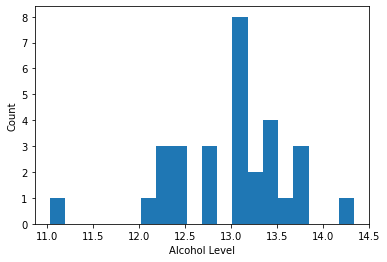

In [62]:
# Plot a histogram of the alcohol levels
plt.hist(data['Alcohol'], bins=20)
plt.xlabel('Alcohol Level')
plt.ylabel('Count')
plt.show()


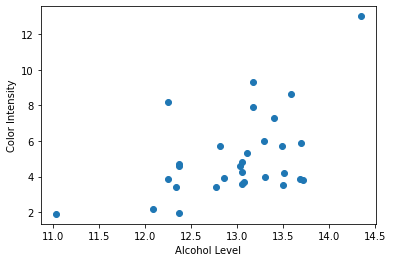

In [63]:
# Plot a scatter plot of alcohol vs color intensity
plt.scatter(data['Alcohol'], data['ColorIntensity'])
plt.xlabel('Alcohol Level')
plt.ylabel('Color Intensity')
plt.show()

In [64]:
import numpy as np
import mdptoolbox

# Define the MDP parameters
P = np.array([[[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.0, 0.0, 1.0]],
              [[0.5, 0.0, 0.5], [0.5, 0.0, 0.5], [0.0, 0.0, 1.0]],
              [[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.0, 0.0, 1.0]]])
R = np.array([[10, 0, 0], [0, 5, 0], [0, 0, 1]])
discount = 0.9

# Create an MDP object
mdp = mdptoolbox.mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=1000)

# Solve the MDP using value iteration
vi_policy = mdp.policy
vi_V = mdp.V
vi_num_iter = mdp.iter

print("Value Iteration Policy: ", vi_policy)
print("Value Iteration Optimal Value Function: ", vi_V)
print("Value Iteration Number of Iterations: ", vi_num_iter)


Value Iteration Policy:  None
Value Iteration Optimal Value Function:  [0. 0. 0.]
Value Iteration Number of Iterations:  0


In [65]:

import numpy as np
import mdptoolbox

# Define the MDP parameters
P = np.array([[[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.0, 0.0, 1.0]],
              [[0.5, 0.0, 0.5], [0.5, 0.0, 0.5], [0.0, 0.0, 1.0]],
              [[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.0, 0.0, 1.0]]])
R = np.array([[10, 0, 0], [0, 5, 0], [0, 0, 1]])
discount = 0.9

# Create an MDP object
mdp = mdptoolbox.mdp.PolicyIteration(P, R, discount)

# Solve the MDP using policy iteration
pi_policy = mdp.policy
pi_V = mdp.V
pi_num_iter = mdp.iter

print("Policy Iteration Policy: ", pi_policy)
print("Policy Iteration Optimal Value Function: ", pi_V)
print("Policy Iteration Number of Iterations: ", pi_num_iter)


Policy Iteration Policy:  [0 1 2]
Policy Iteration Optimal Value Function:  [0. 0. 0.]
Policy Iteration Number of Iterations:  0


In [66]:
# define the states
import itertools
alcohol_levels = ["low", "medium", "high"]
color_levels = ["low", "medium", "high"]
proline_levels = ["low", "medium", "high"]
states = list(itertools.product(alcohol_levels, color_levels, proline_levels))

# define the state space
state_space = {}
for i, state in enumerate(states):
    state_space[state] = i


In [67]:
# define the rewards
actions = ["low", "medium", "high"]

In [68]:
#Get new state function
def get_new_state(state, action):
    alcohol, color, proline = state
    if action == 0: # low action
        if alcohol == "low":
            new_alcohol = "low"
        else:
            new_alcohol = "low" if np.random.random() < 0.8 else "medium"
    elif action == 1: # medium action
        if alcohol == "low":
            new_alcohol = "medium"
        elif alcohol == "medium":
            new_alcohol = "medium" if np.random.random() < 0.5 else "high"
        else:
            new_alcohol = "high" if np.random.random() < 0.8 else "medium"
    else: # high action
        if alcohol == "high":
            new_alcohol = "high"
        else:
            new_alcohol = "high" if np.random.random() < 0.8 else "medium"
    return (new_alcohol, color, proline)


In [69]:

#Get wine ratings function
def get_wine_rating(state):
    """
    Given a state, returns a rating for the quality of the wine, which is determined by the alcohol content and
    the color intensity of the wine.
    """
    alcohol, color, proline = state
    if alcohol == "low":
        if color == "low":
            return 1
        elif color == "medium":
            return 2
        else:
            return 3
    elif alcohol == "medium":
        if color == "low":
            return 2
        elif color == "medium":
            return 4
        else:
            return 6
    else:
        if color == "low":
            return 3
        elif color == "medium":
            return 6
        else:
            return 9


In [70]:
def get_transition_prob(state, action, possible_state):
    """
    Get the probability of transitioning from state to possible_state given the action taken.
    Args:
        state (tuple): the current state
        action (int): the index of the action taken
        possible_state (tuple): the possible new state resulting from taking the action
    Returns:
        float: the probability of transitioning to possible_state given state and action
    """
    # implement the transition function
    # this could be a deterministic or stochastic function, depending on the MDP
    # for example, it could depend on the alcohol content, color intensity, and proline level
    # and involve a series of if-else statements or a probability distribution
    return 0.33


In [71]:
# define the rewards
rewards = np.zeros((len(actions), len(states)))
for i, state in enumerate(states):
    for j, action in enumerate(actions):
        # get the new state after taking the action
        new_state = get_new_state(state, action)
        # calculate the reward based on the quality rating of the wine
        rating = get_wine_rating(new_state)
        reward = rating * 10
        rewards[j, i] = reward
print("Reward is"," " ,rewards[j, i] )

Reward is   90.0


In [72]:
# define the transition probabilities
probabilities = np.zeros((len(actions), len(states), len(states)))
for i, state in enumerate(states):
    for j, action in enumerate(actions):
        # get the new state after taking the action
        new_state = get_new_state(state, action)
        # calculate the probabilities of transitioning to each possible new state
        for k, possible_state in enumerate(states):
            prob = get_transition_prob
            
print(prob)

<function get_transition_prob at 0x0000019AAC27D1F0>


In [49]:
#THE END